In [1]:
using CairoMakie, CSV, DataFrames, Pipe, StatsKit

In [2]:
all_csv = [i for i in readdir("./gaussians") if occursin("csv", i)]
all_df = [CSV.read(joinpath("./gaussians", csv), DataFrame) for csv in all_csv];
long_df = outerjoin(all_df..., on=[:Column1,:itr, :loss]);

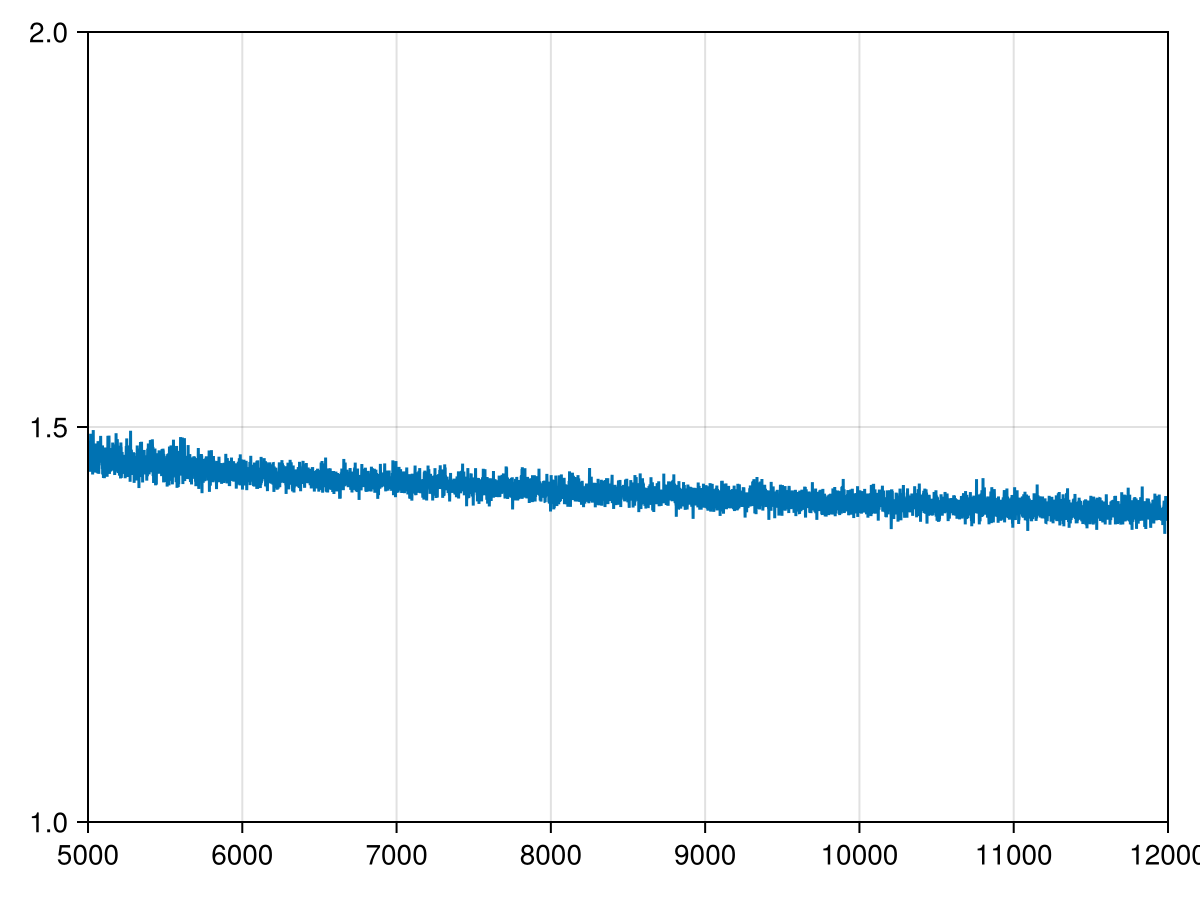

In [3]:

@pipe outerjoin(all_df..., on=[:Column1,:itr, :loss]) |> 
    sort(_, :itr) |> 
    select(_,[:itr, :loss]) |> 
    # filter(:itr => ,_) |>
    lines(eachcol(_)...)


xlims!(current_axis(), 5000, 12000)
ylims!(current_axis(), 1, 2)

current_figure()



In [4]:
all_csv = [i for i in readdir("./moons") if occursin("csv", i)]
all_df = [CSV.read(joinpath("./moons", csv), DataFrame) for csv in all_csv];
long_df = outerjoin(all_df..., on=[:Column1,:itr, :loss]);

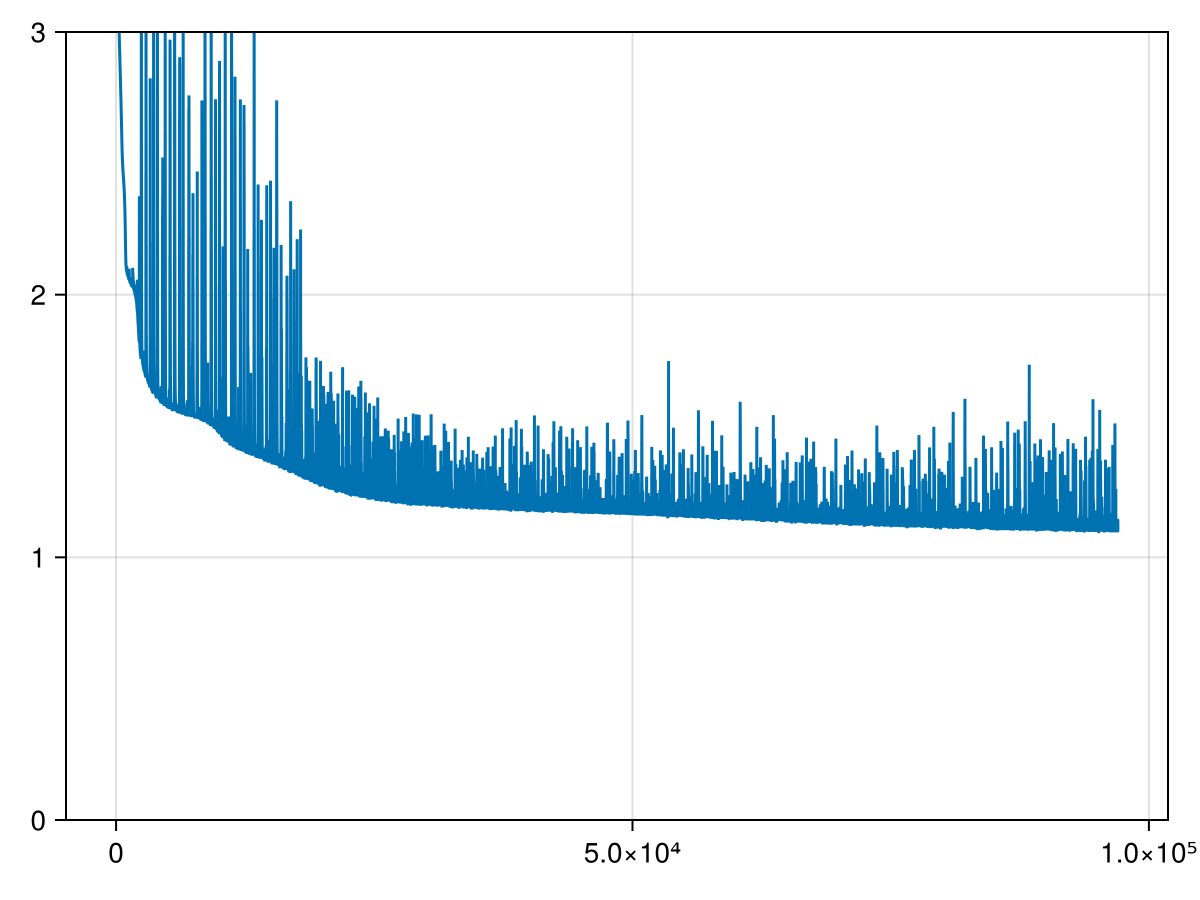

In [5]:

@pipe long_df |> 
    sort(_, :itr) |> 
    select(_,[:itr, :loss]) |> 
    # filter(:itr => ,_) |>
    lines(eachcol(_)...)


# xlims!(current_axis(), 1000, 12000)
ylims!(current_axis(), 0,3)

current_figure()


In [6]:
println(size(long_df)[1])
@pipe long_df |> 
    sort(_, :loss) |>
    first(_,10) |> 
    print(_)

97000
10×3 DataFrame
 Row │ Column1  itr      loss    
     │ Int64    Float64  Float64 
─────┼───────────────────────────
   1 │     141  95142.0  1.09192
   2 │     146  93747.0  1.09431
   3 │     115  95716.0  1.09478
   4 │     171  96972.0  1.09498
   5 │     183  96784.0  1.09498
   6 │     130  96331.0  1.09506
   7 │      41  96642.0  1.09526
   8 │      44  96845.0  1.0953
   9 │     152  93753.0  1.09538
  10 │     193  96594.0  1.09582

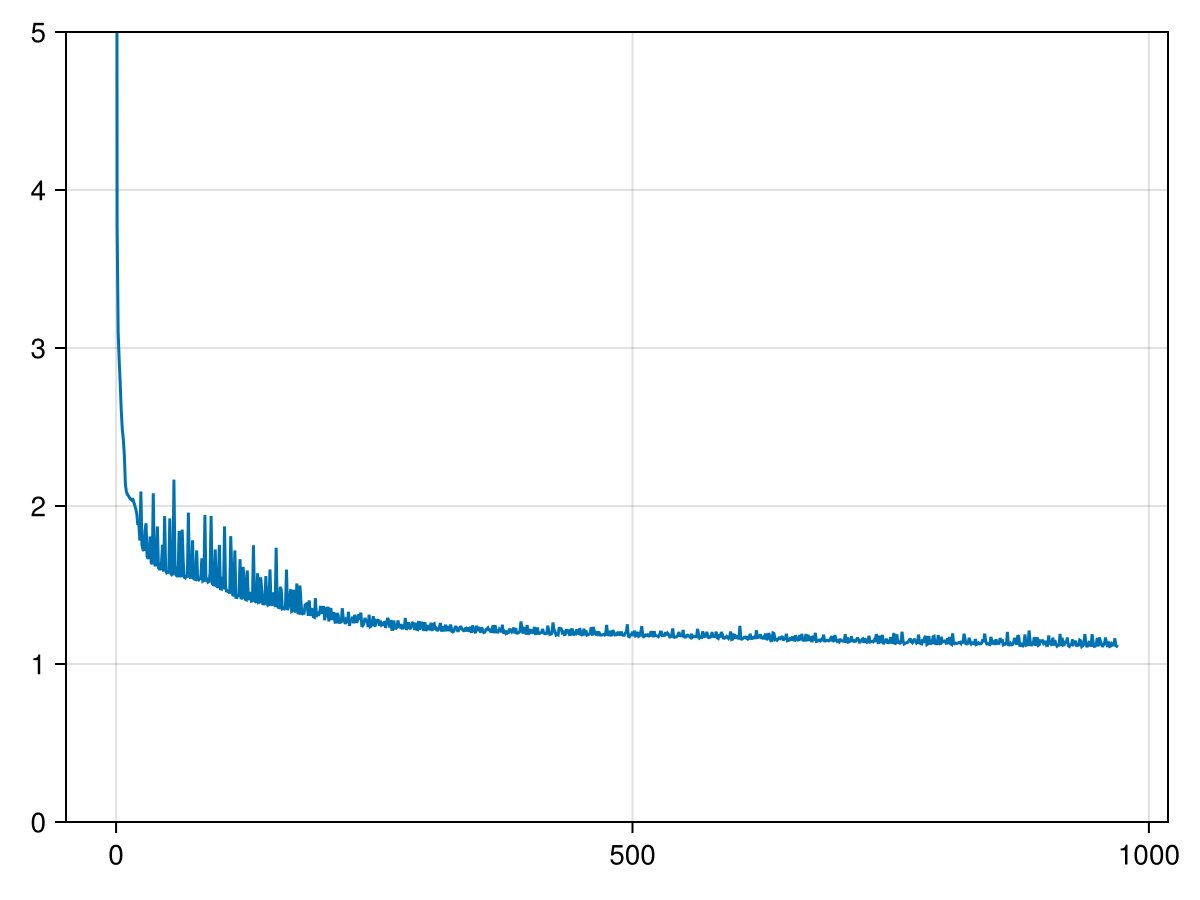

In [7]:
long_df[!,:group] = @pipe long_df |>
    select(_, [:itr, :loss]) |>
    trunc.(Int64, _[:,:itr] .÷ 100)

@pipe groupby(long_df, :group) |> combine(_, :loss=>mean) |>
    lines(eachcol(_)...)


ylims!(current_axis(), 0,5)
current_figure()

In [8]:
all_csv = [i for i in readdir("./spheres") if occursin("csv", i)]
all_df = [CSV.read(joinpath("./spheres", csv), DataFrame) for csv in all_csv];
long_df = outerjoin(all_df..., on=[:Column1,:itr, :loss]);

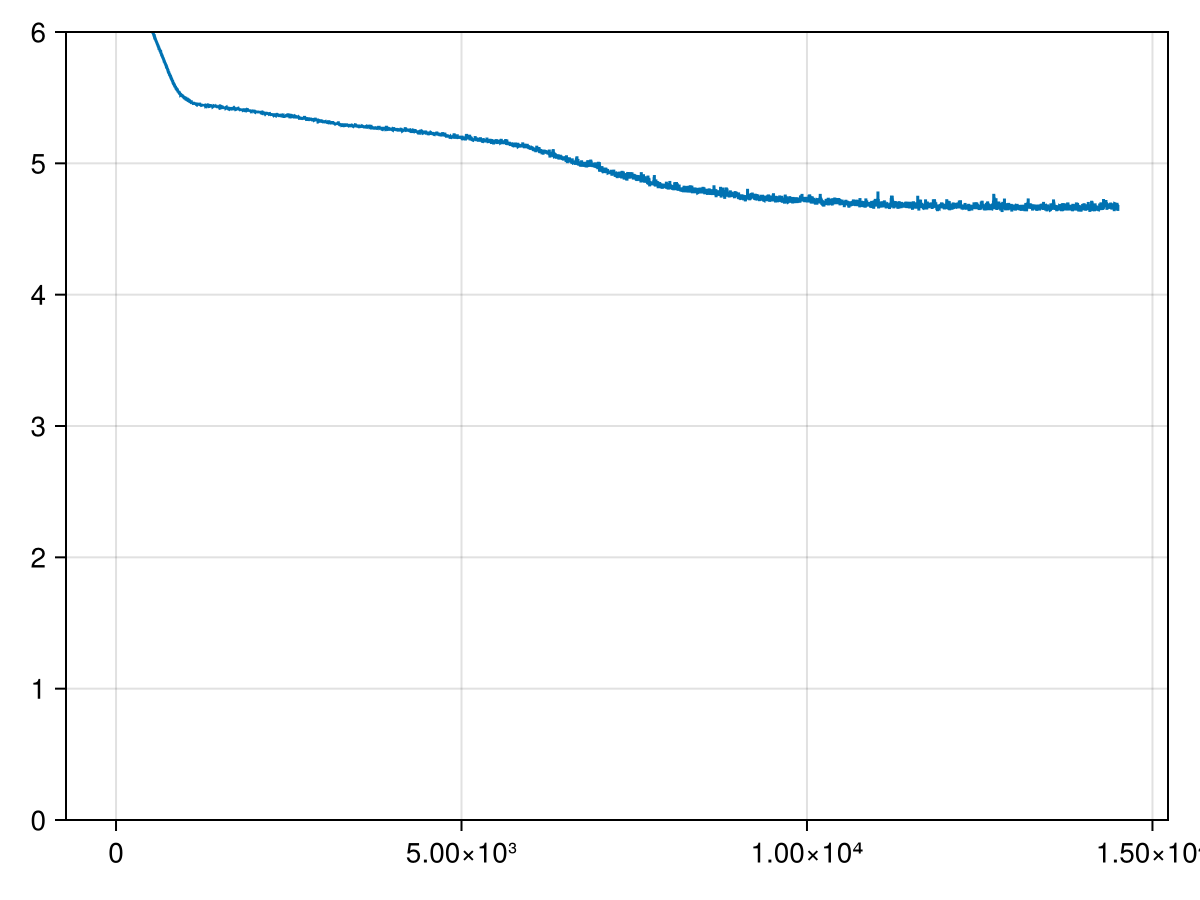

In [9]:
@pipe long_df |> 
    sort(_, :itr) |> 
    select(_,[:itr, :loss]) |> 
    # filter(:itr => ,_) |>
    lines(eachcol(_)...)


# xlims!(current_axis(), 1000, 12000)
ylims!(current_axis(), 0,6)

current_figure()

In [10]:
println(size(long_df)[1])
@pipe long_df |> 
    sort(_, :loss) |>
    first(_,10) |> 
    print(_)

14500
10×3 DataFrame
 Row │ Column1  itr      loss    
     │ Int64    Float64  Float64 
─────┼───────────────────────────
   1 │      23  12824.0  4.62911
   2 │      93  14094.0  4.63048
   3 │      65  13966.0  4.63147
   4 │      63  12964.0  4.63258
   5 │      33  13934.0  4.63261
   6 │      72  13473.0  4.63457
   7 │      77  13178.0  4.63474
   8 │      97  14098.0  4.63492
   9 │      42  13843.0  4.63503
  10 │      53  14154.0  4.63504

146×2 DataFrame
 Row │ group  loss_mean 
     │ Int64  Float64   
─────┼──────────────────
   1 │     0   23.5532
   2 │     1    7.62102
   3 │     2    6.68887
   4 │     3    6.35189
   5 │     4    6.13334
   6 │     5    5.97461
   7 │     6    5.84191
   8 │     7    5.71107
   9 │     8    5.59275
  10 │     9    5.51929
  11 │    10    5.47768
  12 │    11    5.45453
  13 │    12    5.44431
  14 │    13    5.43764
  15 │    14    5.431
  16 │    15    5.42539
  17 │    16    5.41928
  18 │    17    5.41405
  19 │    18    5.40714
  20 │    19    5.40033
  21 │    20    5.39144
  22 │    21    5.38167
  23 │    22    5.37164
  24 │    23    5.36455
  25 │    24    5.36049
  26 │    25    5.35816
  27 │    26    5.34795
  28 │    27    5.33979
  29 │    28    5.33272
  30 │    29    5.32298
  31 │    30    5.31358
  32 │    31    5.30449
  33 │    32    5.29717
  34 │    33    5.29119
  35 │    34    5.28415
  36 │    35    5.27908
  37 │    36    5.27604
  38 │    37    5.26933


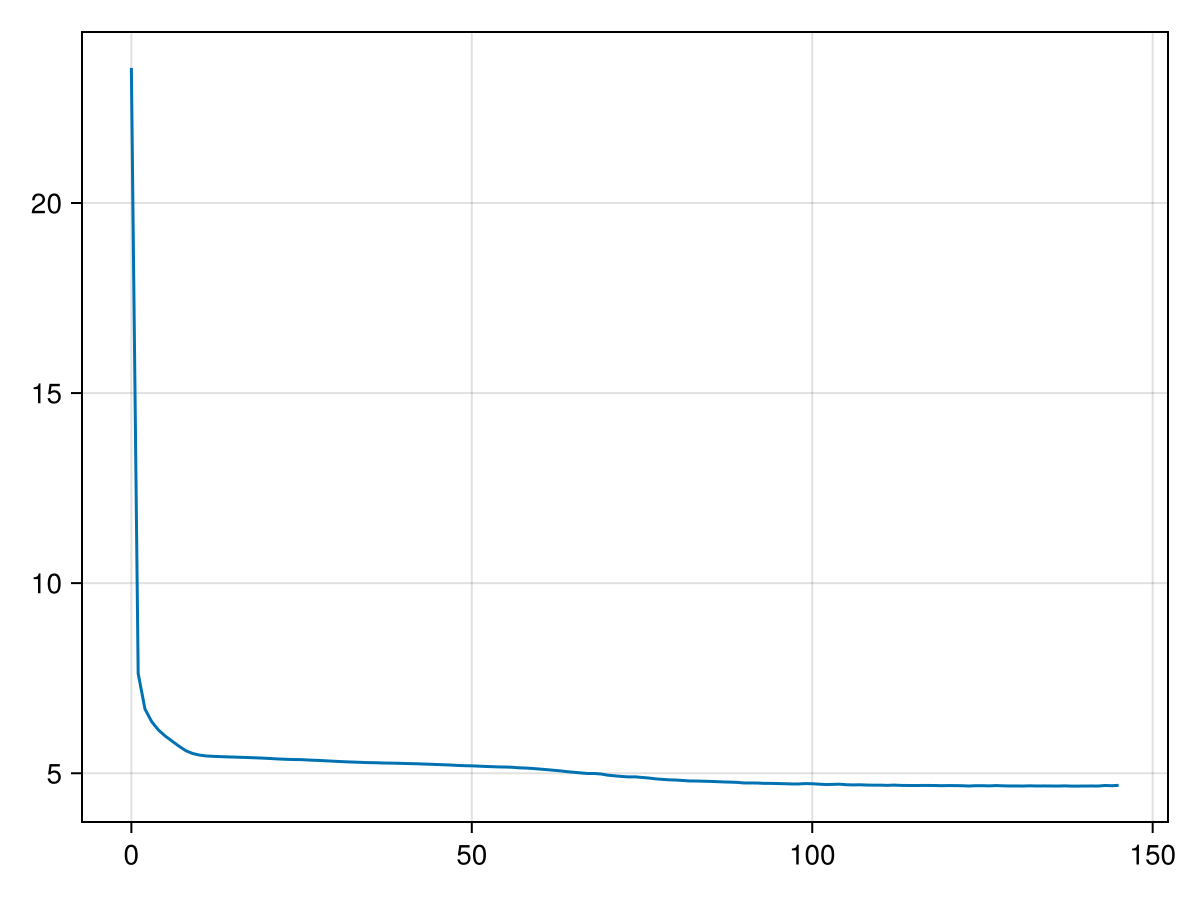

In [11]:

long_df[!,:group] = @pipe long_df |>
    select(_, [:itr, :loss]) |>
    trunc.(Int64, _[:,:itr] .÷ 100)

avg_loss = @pipe groupby(long_df, :group) |> combine(_, :loss=>mean) 

println(avg_loss)

lines(eachcol(avg_loss)...)
# ylims!(current_axis(), 0,5)
current_figure()